# DATA 101 Project

## Milestone #1

Prepare and clean the Netflix Movies and TV Shows Dataset. This involves loading the dataset, performing initial data inspection, handling missing values, processing multi-value fields, converting data types, and removing duplicate entries. Provide plots to visualize the distribution of missing values, the top N values from a selected multi-value field, and the distribution of 'release_year' after conversion. Summarize the data preparation and cleaning steps performed.


3.  **Netflix Movies and TV Shows Dataset**
    *   **Description**: This dataset includes information about movies and TV shows available on Netflix, such as title, cast, director, country, release year, duration, listed in categories, and description.
    *   **Suitability for EDA**: This dataset is rich in diverse data types, making it excellent for content analysis, trend identification, and natural language processing (NLP) tasks. EDA aspects include:
        *   **Textual Analysis**: Analyzing 'title' and 'description' for common keywords, sentiment, or themes.
        *   **Categorical Analysis**: Exploring distributions and relationships between 'type' (movie/TV show), 'director', 'country', 'listed_in' (genres), and 'rating'.
        *   **Temporal Trends**: Analyzing trends over 'release_year' and 'date_added', such as the growth of content from different countries or genres.
        *   **Missing Values**: Handling missing data in 'director', 'cast', and 'country'.
        *   **Multi-value Fields**: Effectively processing 'cast' and 'listed_in' which are often comma-separated strings.

## Load Dataset

Load the Netflix Movies and TV Shows Dataset into a pandas DataFrame. This will be the foundational step for all subsequent data preparation.


1. Import the pandas library and load the specified dataset ('netflix_titles.csv' from https://github.com/maudem-data/DATA-101/tree/main/datasets) into a DataFrame named `df`, then display its first 5 rows to ensure correct loading.



In [33]:
import pandas as pd

# Construct the raw URL for netflix_titles.csv from the given GitHub repository
url = 'https://raw.githubusercontent.com/maudem-data/DATA-101/main/datasets/netflix_titles.csv'

# Load the dataset into a DataFrame named df
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Initial Data Inspection

Perform an initial inspection of the dataset. This includes checking data types, reviewing the first few rows, and getting a summary of descriptive statistics to understand the data's structure and content.


2. Perform an initial inspection: display data types and non-null values using `.info()`, and generate descriptive statistics for numerical and all columns using `.describe()` and `.describe(include='all')` respectively.



In [56]:
print("\n--- DataFrame Info ---\n")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---\n")
df.describe()

#print("\n--- Descriptive Statistics for All Columns ---\n")
#df.describe(include='all')


--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_minutes  6128 non-null   float64       
 13  num_seasons       2676 non-null   float64       
dtyp

,date_added,release_year,duration_minutes,num_seasons
count,8709,8807.000000,6128.000000,2676.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,99.577187,1.764948
min,2008-01-01 00:00:00,1925.000000,3.000000,1.000000
25%,2018-04-20 00:00:00,2013.000000,87.000000,1.000000
50%,2019-07-12 00:00:00,2017.000000,98.000000,1.000000
75%,2020-08-26 00:00:00,2019.000000,114.000000,2.000000
max,2021-09-25 00:00:00,2021.000000,312.000000,17.000000
std,NaN,8.819312,28.290593,1.582752


## Handle Missing Values

Identify and address missing values in key columns such as 'director', 'cast', and 'country'. This may involve imputation, removal, or marking as 'Unknown' based on the column's nature and impact on analysis. Provide a plot to visualize the distribution of missing values across different columns.


3. Calculate the number and percentage of missing values for each column to understand the extent of missing data before proceeding with imputation, as requested by the instructions.



In [35]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("--- Missing Values Count and Percentage ---")
print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))


--- Missing Values Count and Percentage ---
            Missing Values  Percentage
director              2634   29.908028
country                831    9.435676
cast                   825    9.367549
date_added              10    0.113546
rating                   4    0.045418
duration                 3    0.034064


4. Proceed to fill the missing values in the specified columns ('director', 'cast', 'country', 'date_added', 'rating', and 'duration') with their respective 'Unknown' string placeholders. This ensures consistency and prepares the data for further analysis while preserving the rows.



Missing values filled for 'director', 'cast', 'country', 'date_added', 'rating', and 'duration' columns.


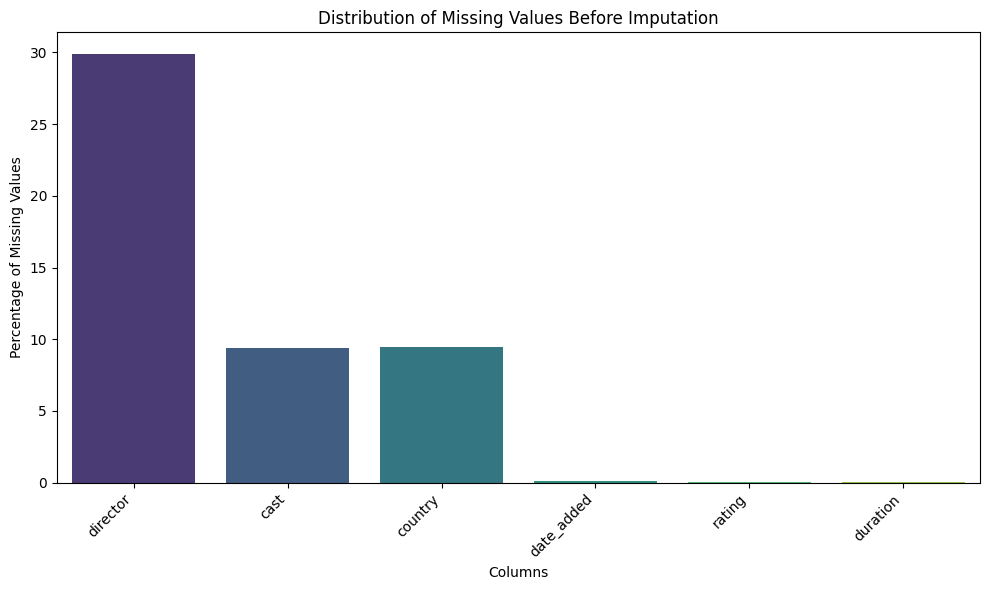

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')
df['date_added'] = df['date_added'].fillna('Unknown Date')
df['rating'] = df['rating'].fillna('Unknown Rating')
df['duration'] = df['duration'].fillna('Unknown Duration')

print("Missing values filled for 'director', 'cast', 'country', 'date_added', 'rating', and 'duration' columns.")

# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_data_to_plot = missing_info[missing_info['Missing Values'] > 0]
sns.barplot(x=missing_data_to_plot.index, y=missing_data_to_plot['Percentage'], hue=missing_data_to_plot.index, palette='viridis', legend=False)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Distribution of Missing Values Before Imputation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Process Multi-Value Fields

Process multi-value fields like 'cast' and 'listed_in' (genres) which are often comma-separated strings. This step will involve splitting these strings into individual entries to facilitate analysis of individual cast members or genres. Provide a plot to visualize the top N values from a selected multi-value field.


5. Define a function to process multi-value fields, apply it to 'listed_in', count the top 10 genres, and then plot the results as requested by the instructions.



Top 10 Genres on Netflix:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


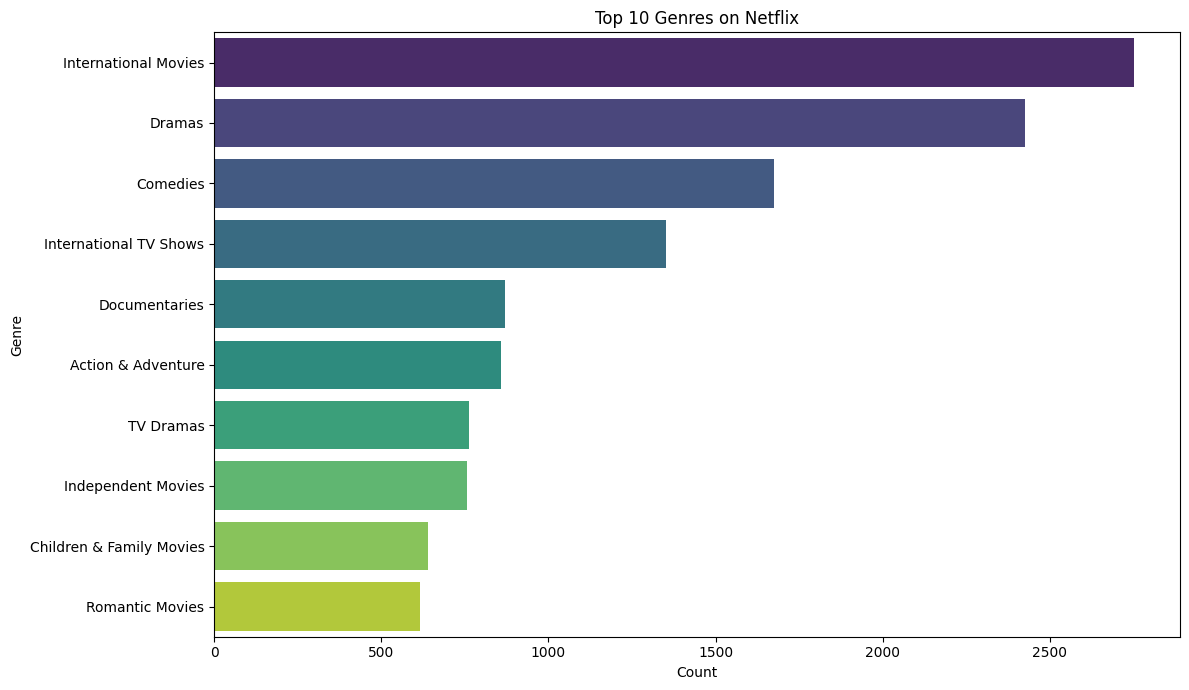

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a function to split multi-value fields
def split_multi_value_column(df, column_name):
    # Ensure the column exists and is a string type
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Replace 'Unknown' placeholders with NaN for proper splitting if they are to be ignored
    # Or ensure they are handled gracefully by the split operation
    temp_series = df[column_name].replace('Unknown Cast', '').replace('Unknown Director', '').replace('Unknown Country', '').replace('Unknown Date', '').replace('Unknown Rating', '').replace('Unknown Duration', '')

    # Split each string by comma, flatten the list, and strip whitespace from each element
    split_values = temp_series.str.split(',').explode().str.strip()

    # Remove any empty strings that might result from splitting or stripping
    split_values = split_values[split_values != '']

    return split_values

# 2. Apply this function to 'listed_in' and 'cast' columns
listed_in_processed = split_multi_value_column(df, 'listed_in')
cast_processed = split_multi_value_column(df, 'cast')

# 3. Count the occurrences of each unique individual value in 'listed_in' and select the top 10
top_genres = listed_in_processed.value_counts().head(10)

print("Top 10 Genres on Netflix:")
print(top_genres)

# 4. Create a horizontal bar plot for the top 10 genres
plt.figure(figsize=(12, 7))
sns.barplot(y=top_genres.index, x=top_genres.values, hue=top_genres.index, palette='viridis', legend=False)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres on Netflix')
plt.tight_layout()

# 5. Display the plot
plt.show()

## Data Type Conversion

Convert columns to appropriate data types. For example, ensure 'release_year' is an integer, and 'date_added' is a datetime object, which is crucial for temporal trend analysis. Provide a plot to show the distribution of 'release_year' after conversion.


6. Convert the 'date_added' column to datetime objects using `pd.to_datetime` with `errors='coerce'` to handle 'Unknown Date' values, and then fill any resulting `NaT` values with 'Unknown Date' to maintain consistency.



Converted 'date_added' to datetime objects. Missing/unparseable dates are now NaT.


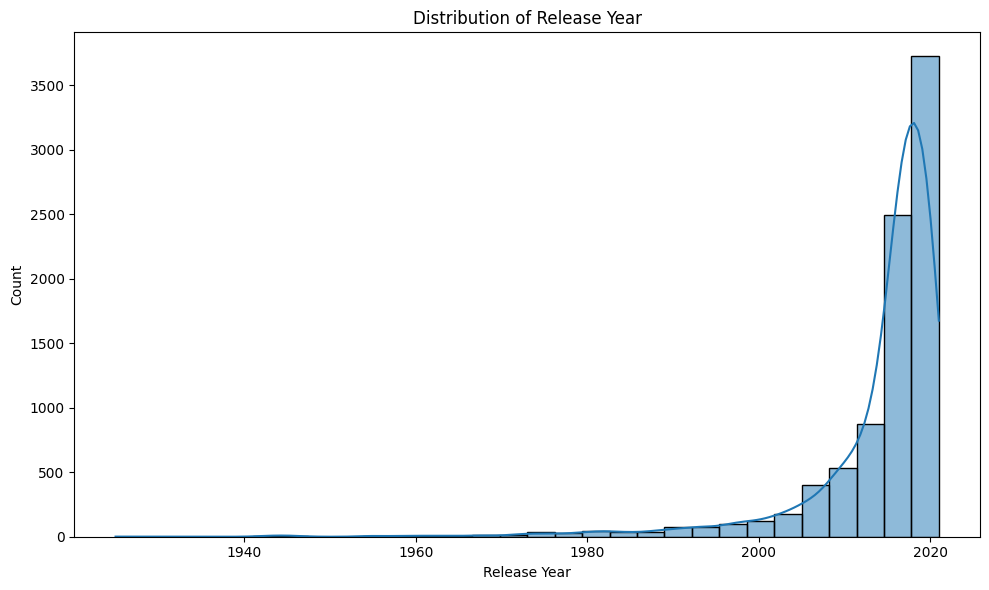

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert 'date_added' to datetime objects, coercing errors to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 2. 'release_year' is already int64, no explicit conversion needed, but ensuring it's numeric for plotting

print("Converted 'date_added' to datetime objects. Missing/unparseable dates are now NaT.")

# 3. Plot the distribution of 'release_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Year')
plt.tight_layout()

# 4. Display the plot
plt.show()

## Remove Duplicate Entries

Identify and remove any duplicate rows in the dataset to ensure data integrity and prevent skewed analysis results.


7. heck for and remove duplicate rows from the DataFrame `df`, then verify the removal and print the updated number of rows to complete the subtask.



In [44]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
print(f"New number of rows in the DataFrame: {len(df)}")

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
New number of rows in the DataFrame: 8807


## Summary:

### Data Analysis Key Findings

*   The dataset comprises 8807 entries and 12 columns.
*   **Data Types and Missing Values:** The `release_year` column is of integer type (`int64`), while the remaining 11 columns are of object type, indicating string or mixed data. Significant missing values were observed in `director` (approximately 29.91% missing), `country` (9.44% missing), and `cast` (9.37% missing). `date_added`, `rating`, and `duration` had fewer missing values (0.11%, 0.05%, and 0.03% respectively).
*   **Content Overview:**
    *   `release_year` ranges from 1925 to 2021, with a mean around 2014.18.
    *   The `type` column is dominated by 'Movie' entries (6131 occurrences).
    *   The `duration` column contains mixed data types (e.g., "1 Season" for TV Shows, minutes for movies), requiring further processing.
    *   'United States' is the most frequent country (2818 occurrences), and 'TV-MA' is the most common rating (3207 times).
*   **Missing Value Handling:** All identified missing values in `director`, `cast`, `country`, `date_added`, `rating`, and `duration` columns were imputed with 'Unknown' placeholders (e.g., 'Unknown Director').
*   **Multi-Value Field Processing:**
    *   The top 10 genres identified from the `listed_in` column are: 'International Movies' (2752), 'Dramas' (2427), 'Comedies' (1674), 'International TV Shows' (1351), 'Documentaries' (869), 'Action & Adventure' (859), 'TV Dramas' (763), 'Independent Movies' (756), 'Children & Family Movies' (641), and 'Romantic Movies' (616).
*   **Data Type Conversion:** The `date_added` column was successfully converted to datetime objects, with unparseable entries appropriately set to `NaT` (Not a Time). The `release_year` column was already in an appropriate integer format.
*   **Duplicate Entries:** No duplicate rows were found in the dataset; the total number of rows remains 8807.

### Insights or Next Steps

*   The dataset is now in a considerably cleaner state, with missing values addressed and multi-value fields processed, making it ready for exploratory data analysis, particularly for analyzing trends over time and popular genres.
*   Further refinement is needed for the `duration` column to separate movie runtimes from TV show season counts, which will enable more accurate numerical analysis for duration-related insights.


## Milestone #2

Exploratory Data Analysis (EDA) on a selected real-world dataset, including data loading, initial inspection, univariate and bivariate analysis, handling missing values and outliers, and summarizing key findings.


Next, let's prepare the 'duration' column for analysis. This involves extracting numerical values for movie durations (in minutes) and TV show seasons from the 'duration' column, converting them into appropriate numerical types to enable quantitative analysis. I will create two new columns: `duration_minutes` for movies and `num_seasons` for TV shows, filling the non-applicable values with `NaN`.

First, define a function that processes the 'duration' column based on the 'type' of content. Then, apply this function to the DataFrame to create the new `duration_minutes` and `num_seasons` columns. Finally, display the first few rows of the DataFrame, including the newly created columns, to verify the extraction and conversion.

## Prepare 'duration' column for analysis

Extract numerical values for movie durations (in minutes) and TV show seasons from the 'duration' column, converting them into appropriate numerical types to enable quantitative analysis. This is crucial as the column currently contains mixed string formats (e.g., 'X min', 'X Seasons').


1. Define a function to process the 'duration' column based on the 'type' of content (Movie or TV Show) and extract numerical values for duration in minutes or number of seasons, respectively. This function will then be applied to the DataFrame to create new 'duration_minutes' and 'num_seasons' columns.



In [45]:
import numpy as np

def process_duration(row):
    duration_val = row['duration']
    content_type = row['type']

    if duration_val == 'Unknown Duration':
        return pd.Series({'duration_minutes': np.nan, 'num_seasons': np.nan})

    if content_type == 'Movie':
        try:
            # Extract numerical part and convert to int
            minutes = int(duration_val.replace(' min', ''))
            return pd.Series({'duration_minutes': minutes, 'num_seasons': np.nan})
        except ValueError:
            return pd.Series({'duration_minutes': np.nan, 'num_seasons': np.nan})
    elif content_type == 'TV Show':
        try:
            # Extract numerical part and convert to int
            seasons = int(duration_val.replace(' Seasons', '').replace(' Season', ''))
            return pd.Series({'duration_minutes': np.nan, 'num_seasons': seasons})
        except ValueError:
            return pd.Series({'duration_minutes': np.nan, 'num_seasons': np.nan})
    else:
        return pd.Series({'duration_minutes': np.nan, 'num_seasons': np.nan})

# Apply the function to create new columns
df[['duration_minutes', 'num_seasons']] = df.apply(process_duration, axis=1)

print("New columns 'duration_minutes' and 'num_seasons' created.")
# Display the first 5 rows with the new columns
print("\n--- First 5 rows with new duration columns ---")
print(df[['title', 'type', 'duration', 'duration_minutes', 'num_seasons']].head())

New columns 'duration_minutes' and 'num_seasons' created.

--- First 5 rows with new duration columns ---
                   title     type   duration  duration_minutes  num_seasons
0   Dick Johnson Is Dead    Movie     90 min              90.0          NaN
1          Blood & Water  TV Show  2 Seasons               NaN          2.0
2              Ganglands  TV Show   1 Season               NaN          1.0
3  Jailbirds New Orleans  TV Show   1 Season               NaN          1.0
4           Kota Factory  TV Show  2 Seasons               NaN          2.0


## Univariate Analysis: Categorical Features

Analyze the distribution of key categorical features such as 'type', 'rating', and 'country'. Use bar plots or count plots to visualize the frequency of each category. Also, identify and visualize the top N countries by content.


2. Distribution of the 'type' column using a count plot.



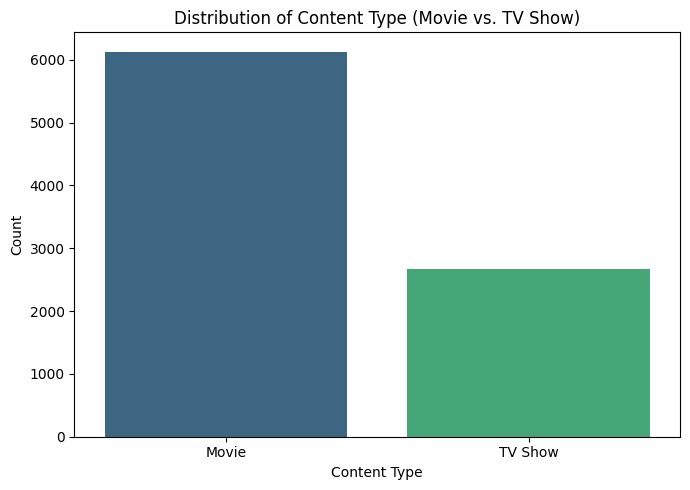

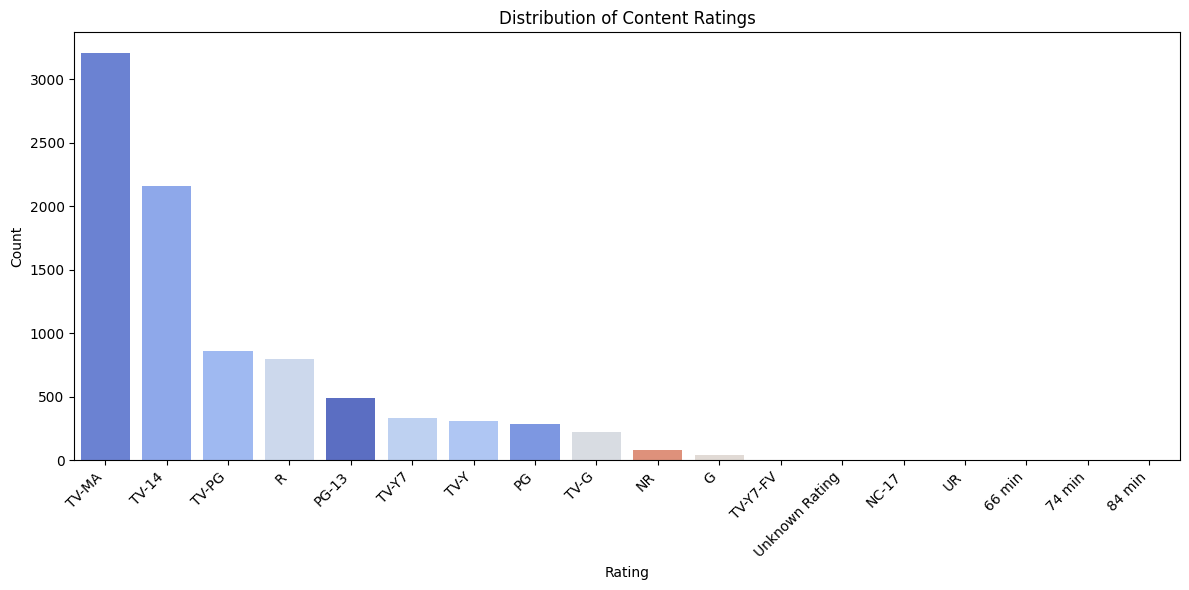

Top 10 Countries by Content:
country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


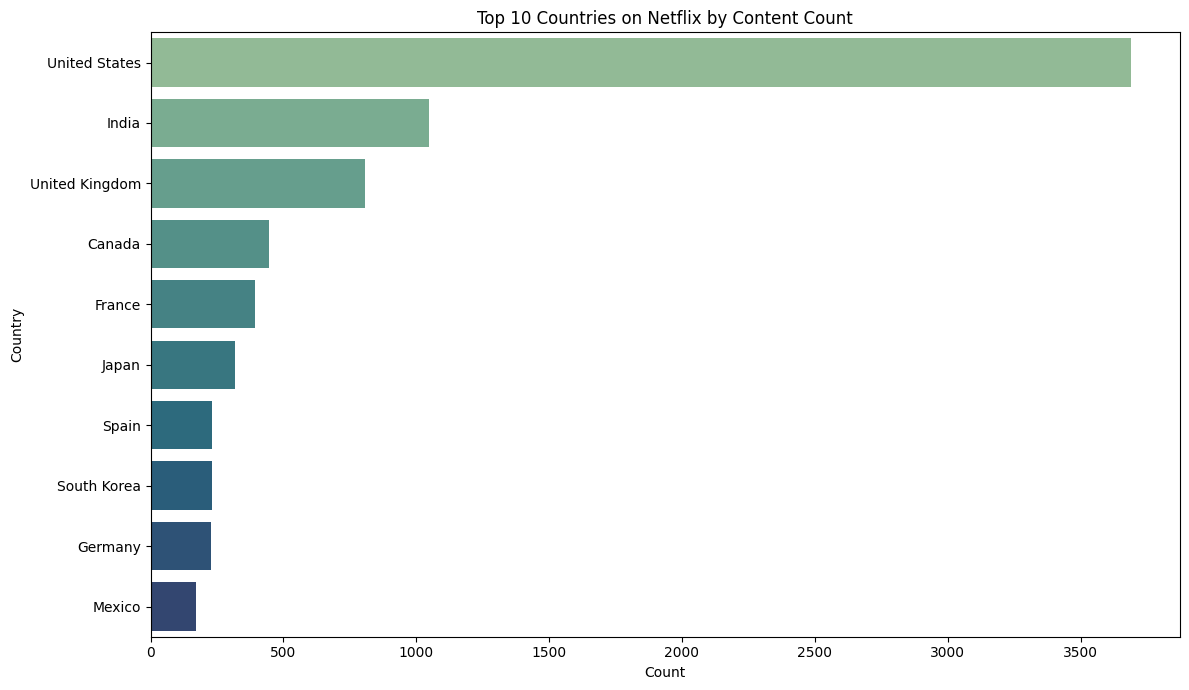

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot the distribution of the 'type' column (fixed FutureWarning)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='type', hue='type', palette='viridis', legend=False)
plt.title('Distribution of Content Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Plot the distribution of the 'rating' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='rating', palette='coolwarm', order=df['rating'].value_counts().index, legend=False)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# 3. Apply split_multi_value_column function to 'country' and remove 'Unknown Country'
# The function `split_multi_value_column` was defined earlier.
country_processed = split_multi_value_column(df, 'country')
country_processed = country_processed[country_processed != 'Unknown Country']

# 4. Get the top 10 most frequent countries
top_countries = country_processed.value_counts().head(10)

print("Top 10 Countries by Content:")
print(top_countries)

# 5. Create a horizontal bar plot for these top 10 countries
plt.figure(figsize=(12, 7))
sns.barplot(y=top_countries.index, x=top_countries.values, hue=top_countries.index, palette='crest', legend=False)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries on Netflix by Content Count')
plt.tight_layout()
plt.show()

## Univariate Analysis: Temporal Features

Further explore the distribution and trends of 'date_added' (after conversion to datetime objects) to identify patterns in content additions over time. Visualize the number of titles added per year or month.


3. Filter out rows where 'date_added' is 'NaT' (Not a Time) to ensure accurate year and month extraction. Then, extract the year and month from the valid 'date_added' entries into new columns. Also calculate the count of titles added per year and month and then display the first few rows of the DataFrame to verify the new columns and the filtered data.



In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'date_added' is 'NaT' (Not a Time) for temporal analysis
df_temporal = df[df['date_added'].notna()].copy()

# 1. Extract the year from the 'date_added' column and store it in a new column named 'year_added'
df_temporal['year_added'] = df_temporal['date_added'].dt.year

# 4. Extract the month from the 'date_added' column and store it in a new column named 'month_added'
df_temporal['month_added'] = df_temporal['date_added'].dt.month_name()

# Display the first few rows with the new columns to verify
print("--- DataFrame with 'year_added' and 'month_added' ---")
print(df_temporal[['date_added', 'year_added', 'month_added']].head())


--- DataFrame with 'year_added' and 'month_added' ---
  date_added  year_added month_added
0 2021-09-25        2021   September
1 2021-09-24        2021   September
2 2021-09-24        2021   September
3 2021-09-24        2021   September
4 2021-09-24        2021   September


4. Calculate the counts of titles added per year and per month and then generate the requested line plot for yearly additions and a bar plot for monthly additions.



--- Titles Added Per Year ---
year_added
2008     2
2009     2
2010     1
2011    13
2012     3
Name: count, dtype: int64


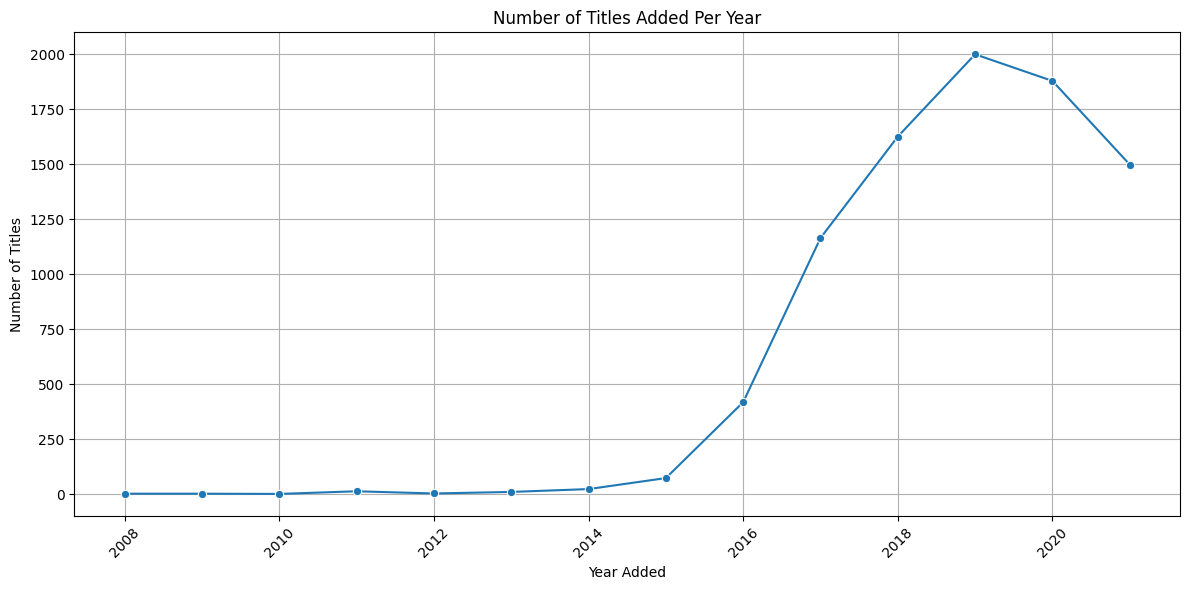


--- Titles Added Per Month ---
month_added
January     727
February    557
March       734
April       759
May         626
Name: count, dtype: int64


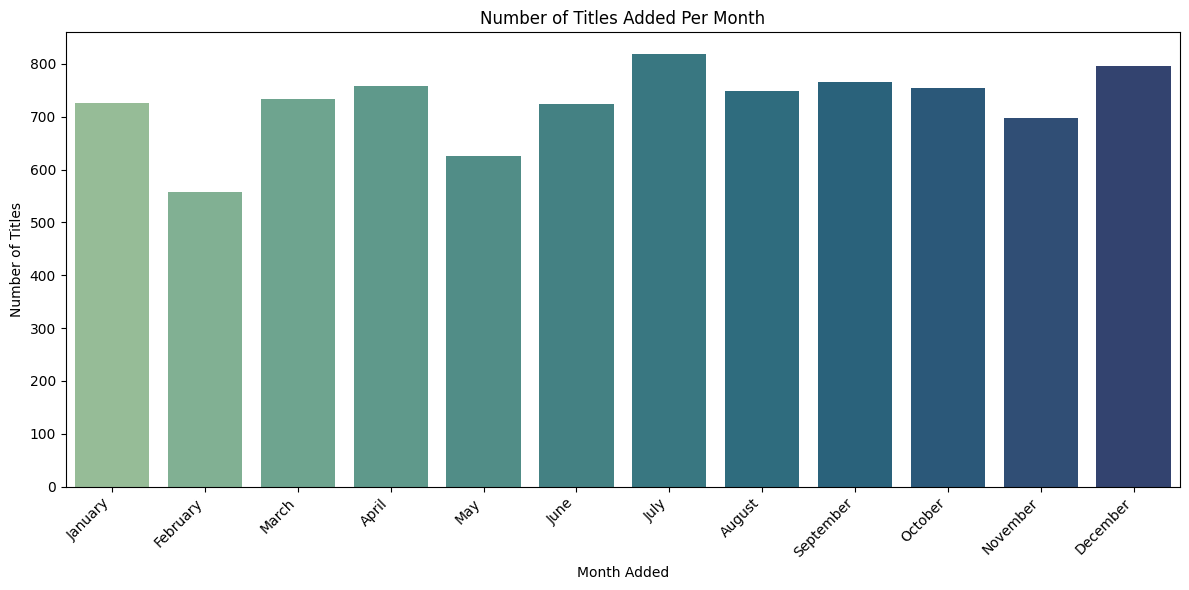

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calculate the count of titles added per year
titles_per_year = df_temporal['year_added'].value_counts().sort_index()

print("--- Titles Added Per Year ---")
print(titles_per_year.head())

# 3. Create a line plot to visualize the trend of titles added per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Calculate the count of titles added per month
# Define a specific order for months for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
titles_per_month = df_temporal['month_added'].value_counts().reindex(month_order)

print("\n--- Titles Added Per Month ---")
print(titles_per_month.head())

# 6. Create a bar plot to visualize the distribution of titles added per month
plt.figure(figsize=(12, 6))
sns.barplot(x=titles_per_month.index, y=titles_per_month.values, hue=titles_per_month.index, palette='crest', legend=False)
plt.title('Number of Titles Added Per Month')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Multi-Value Fields: Top Cast and Directors

Identify and visualize the top N actors/actresses and directors based on their appearance frequency in the dataset.


5. Process the 'cast' column by splitting multi-value entries, filtering out 'Unknown Cast', counting the top 10 cast members, and then visualizing them with a horizontal bar plot, as instructed.



Top 10 Cast Members on Netflix:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


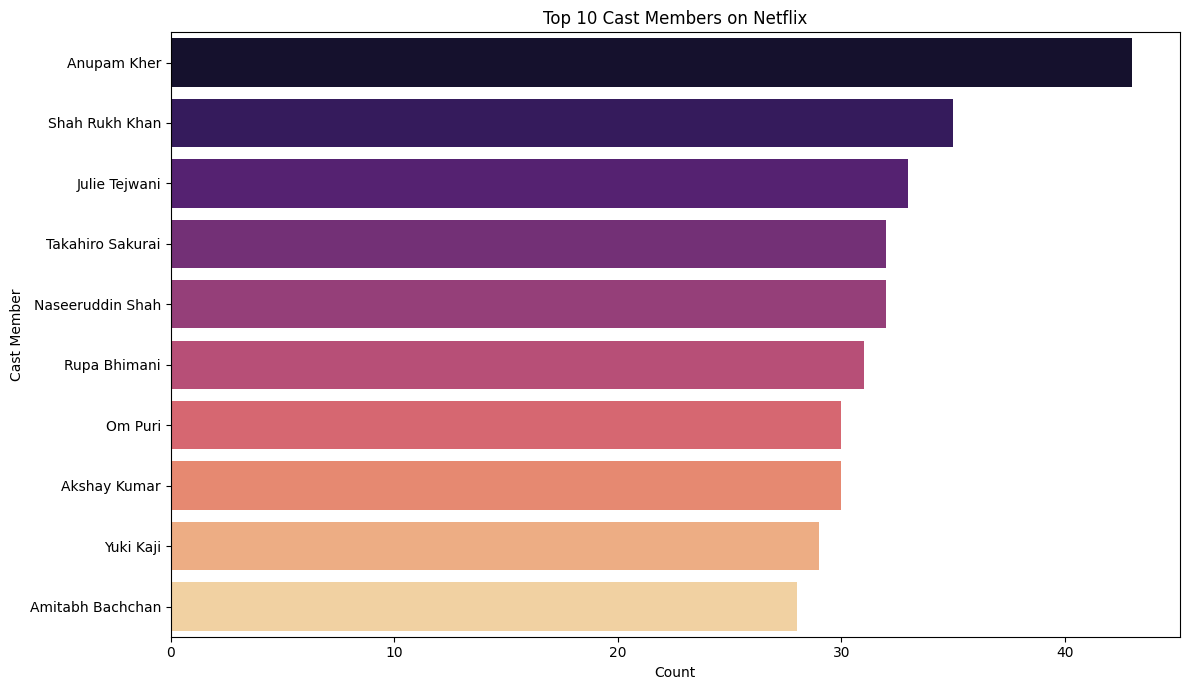

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Apply split_multi_value_column function to 'cast'
# The function `split_multi_value_column` was defined earlier.
cast_processed = split_multi_value_column(df, 'cast')

# 2. Filter out 'Unknown Cast'
cast_processed = cast_processed[cast_processed != 'Unknown Cast']

# 3. Count the occurrences of each unique cast member and select the top 10
top_cast = cast_processed.value_counts().head(10)

print("Top 10 Cast Members on Netflix:")
print(top_cast)

# 4. Create a horizontal bar plot for the top 10 cast members
plt.figure(figsize=(12, 7))
sns.barplot(y=top_cast.index, x=top_cast.values, hue=top_cast.index, palette='magma', legend=False)
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.title('Top 10 Cast Members on Netflix')
plt.tight_layout()
plt.show()

6. Process the 'director' column by splitting multi-value entries, filtering out 'Unknown Director', counting the top 10 directors, and then visualizing them with a horizontal bar plot, as instructed.



Top 10 Directors on Netflix:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


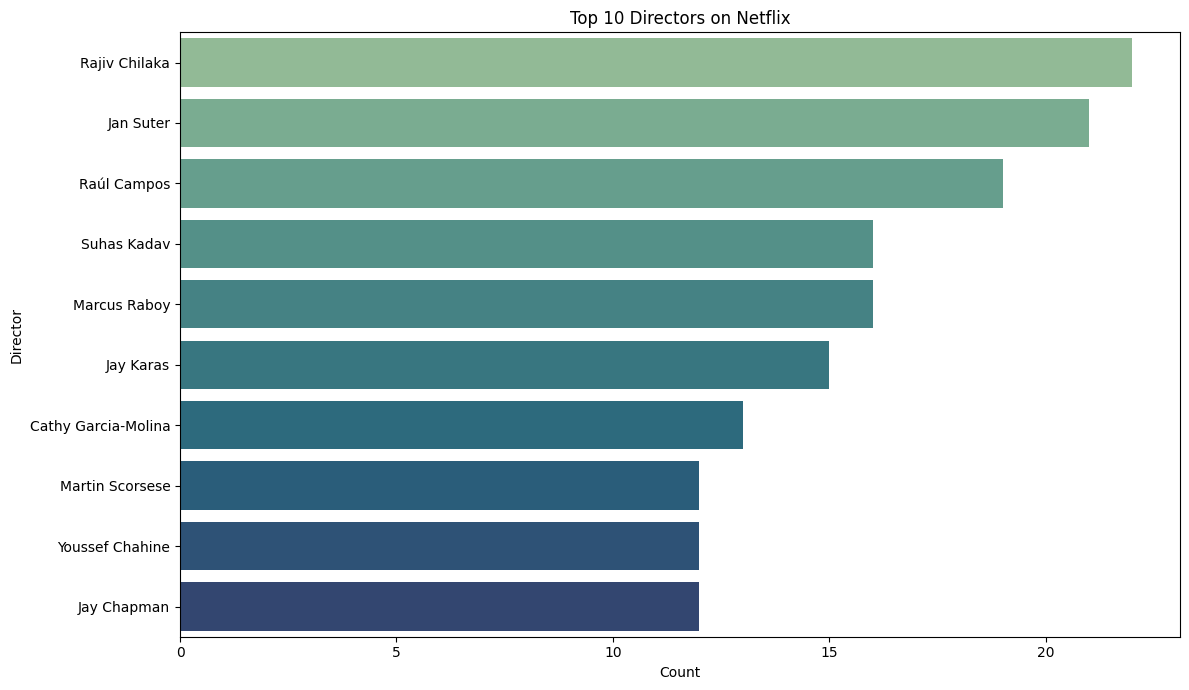

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Apply split_multi_value_column function to 'director'
# The function `split_multi_value_column` was defined earlier.
director_processed = split_multi_value_column(df, 'director')

# 6. Filter out 'Unknown Director'
director_processed = director_processed[director_processed != 'Unknown Director']

# 7. Count the occurrences of each unique director and select the top 10
top_directors = director_processed.value_counts().head(10)

print("Top 10 Directors on Netflix:")
print(top_directors)

# 8. Create a horizontal bar plot for the top 10 directors
plt.figure(figsize=(12, 7))
sns.barplot(y=top_directors.index, x=top_directors.values, hue=top_directors.index, palette='crest', legend=False)
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors on Netflix')
plt.tight_layout()
plt.show()

## Bivariate Analysis: Type vs. Other Features

Investigate relationships between the 'type' of content (Movie/TV Show) and other relevant features such as 'rating', 'country', and the newly processed 'duration'. Use appropriate visualizations like stacked bar charts or box plots.


7. Create a cross-tabulation of 'type' and 'rating', normalize it to percentages within each content type, and then visualize this relationship using a stacked bar plot, ensuring the plot is clearly labeled and easy to read.



--- Contingency Table of Type vs. Rating ---
rating   66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  \
type                                                                           
Movie         1       1       1  41      3  75  287    490  797   1427   126   
TV Show       0       0       0   0      0   5    0      0    2    733    94   

rating   TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  Unknown Rating  
type                                                              
Movie     2062    540   131    139         5   3               2  
TV Show   1145    323   176    195         1   0               2  

--- Normalized Contingency Table (Percentages) ---
rating     66 min    74 min    84 min         G     NC-17        NR        PG  \
type                                                                            
Movie    0.016311  0.016311  0.016311  0.668733  0.048932  1.223291  4.681129   
TV Show  0.000000  0.000000  0.000000  0.000000  0.000000  0.186846  0.

<Figure size 1200x700 with 0 Axes>

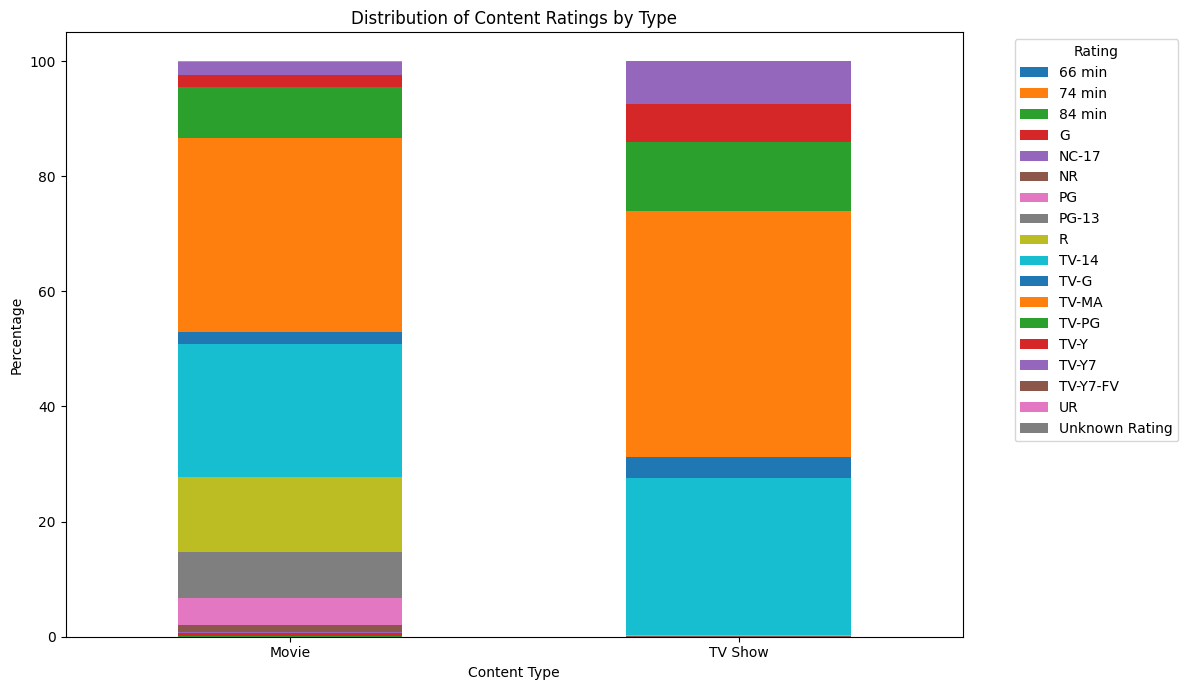

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a cross-tabulation of 'type' and 'rating'
# Ensure 'Unknown Rating' is handled if it's considered an actual category.
# If we want to exclude it from the analysis, we'd filter it out first.
# For now, let's include it as a category.
contingency_table = pd.crosstab(df['type'], df['rating'])

print("--- Contingency Table of Type vs. Rating ---")
print(contingency_table)

# 2. Normalize the cross-tabulation to show percentages within each content type
# Normalize by index (axis=1) to get percentages for each 'type'
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\n--- Normalized Contingency Table (Percentages) ---")
print(contingency_table_normalized)

# 3. Create a stacked bar plot from the normalized cross-tabulation
plt.figure(figsize=(12, 7))
contingency_table_normalized.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Content Ratings by Type')
plt.xlabel('Content Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0) # Rotate x-axis labels if necessary, 0 for now as only 2 categories
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 4. Display the plot
plt.show()

8. Analyze the relationship between content 'type' and 'country'. This involves creating a cross-tabulation of 'type' and 'country', and then visualizing the top 5 countries for Movies and TV Shows separately to understand their distribution across content types.




--- Top 5 Countries for Movies ---

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Name: Movie, dtype: int64

--- Top 5 Countries for TV Shows ---

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Name: TV Show, dtype: int64


<Figure size 1400x800 with 0 Axes>

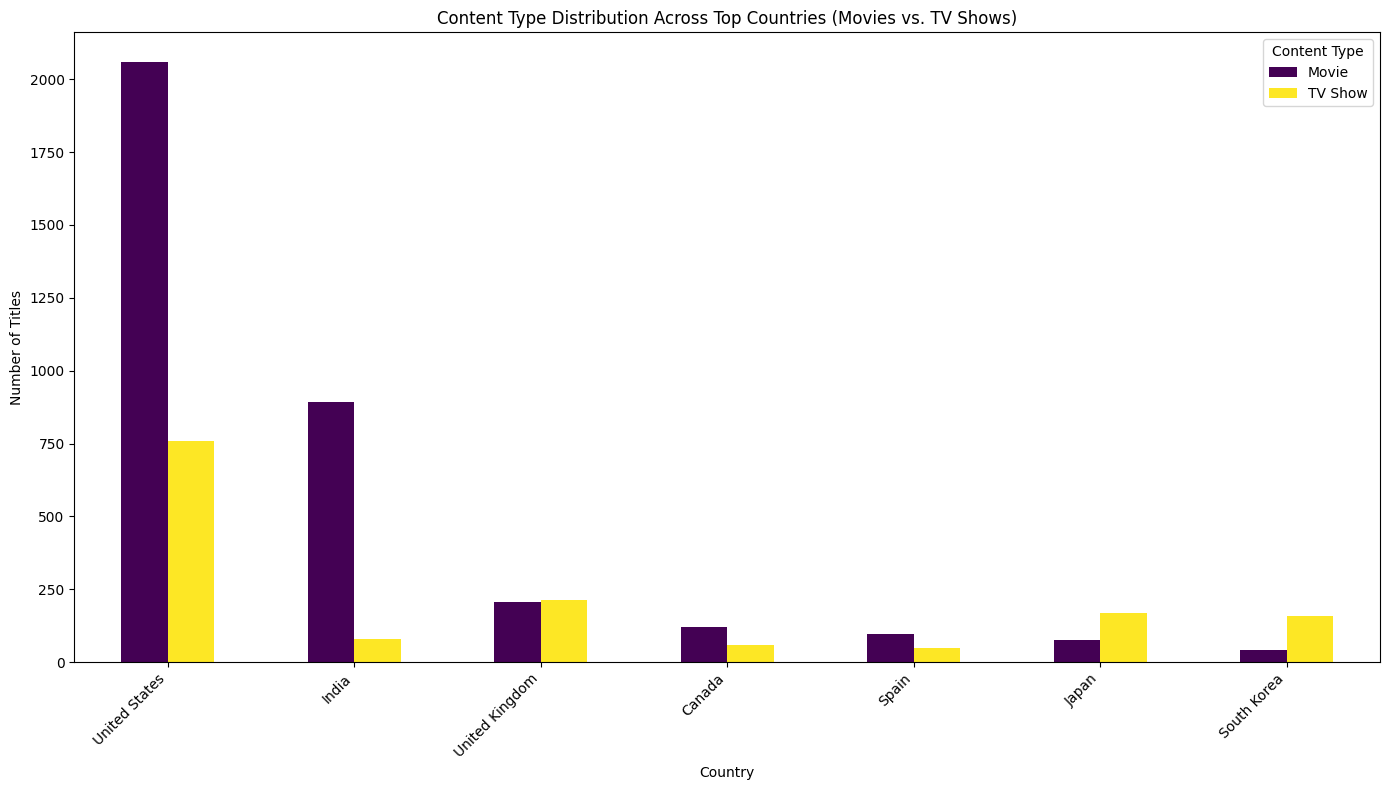

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of 'type' and 'country'
country_type_crosstab = pd.crosstab(df['type'], df['country'])

# Filter out 'Unknown Country' for better visualization of actual countries
country_type_crosstab = country_type_crosstab.drop(columns='Unknown Country', errors='ignore')

# Get top 5 countries for Movies
top_movie_countries = country_type_crosstab.loc['Movie'].nlargest(5)

# Get top 5 countries for TV Shows
top_tvshow_countries = country_type_crosstab.loc['TV Show'].nlargest(5)

print("\n--- Top 5 Countries for Movies ---\n")
print(top_movie_countries)
print("\n--- Top 5 Countries for TV Shows ---\n")
print(top_tvshow_countries)

# Combine top countries for plotting
all_top_countries = pd.concat([top_movie_countries, top_tvshow_countries]).index.unique()

# Filter the original cross-tabulation to include only these top countries
filtered_crosstab = country_type_crosstab[all_top_countries]

# Plotting the distribution of content type by top countries
plt.figure(figsize=(14, 8))
filtered_crosstab.T.plot(kind='bar', stacked=False, figsize=(14, 8), cmap='viridis')
plt.title('Content Type Distribution Across Top Countries (Movies vs. TV Shows)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

9. Create box plots to visualize the distribution of 'duration_minutes' for movies and 'num_seasons' for TV shows, enabling a comparison of content length across types.



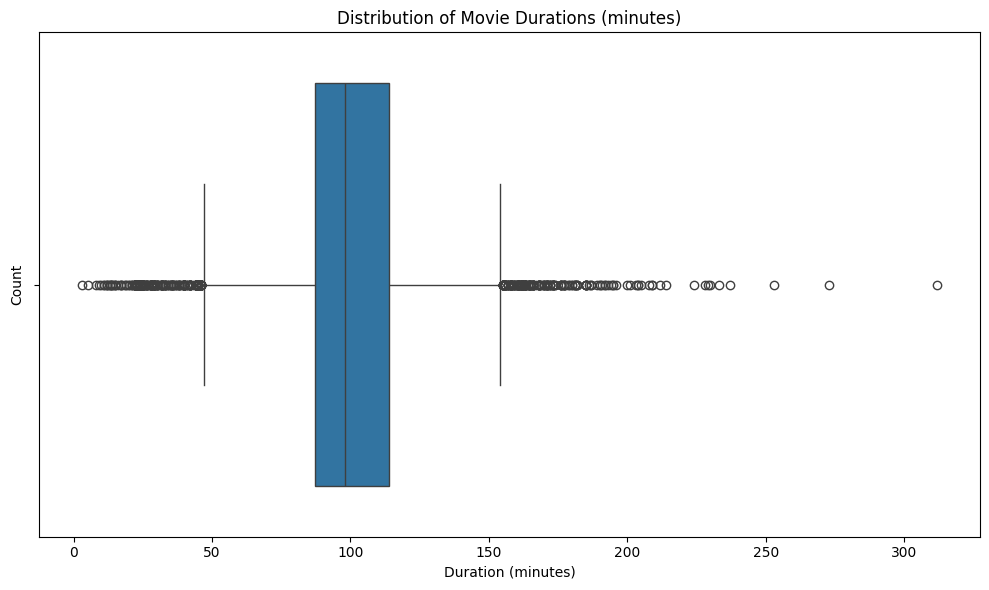

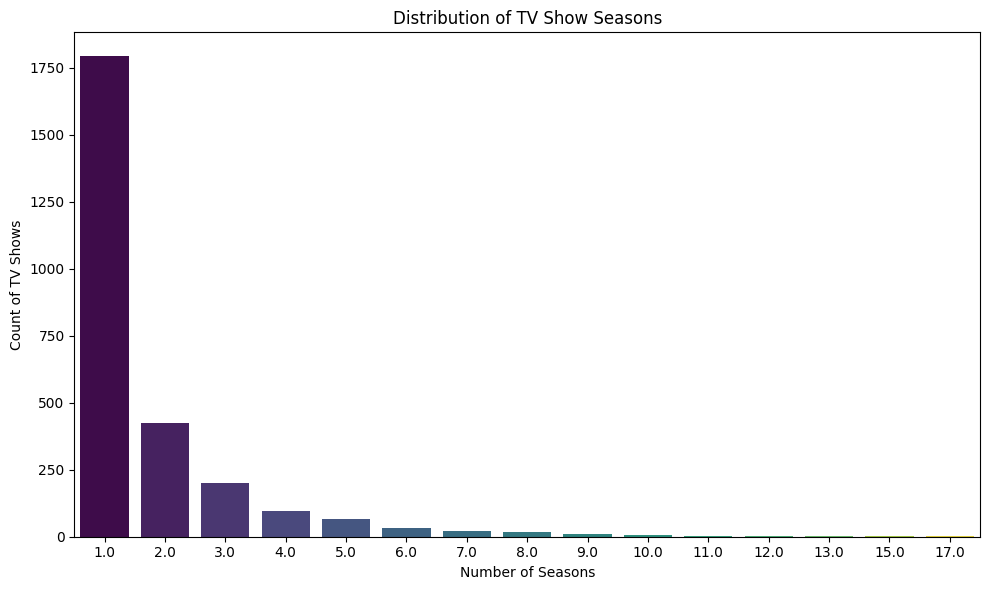

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot for Movie durations
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[df['type'] == 'Movie']['duration_minutes'])
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Bar plot for TV Show seasons counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df[df['type'] == 'TV Show']['num_seasons'], hue=df[df['type'] == 'TV Show']['num_seasons'], palette='viridis', legend=False)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Duration Column Preparation**: Numerical values for movie durations (in minutes) and TV show seasons were successfully extracted from the 'duration' column. Two new columns, `duration_minutes` and `num_seasons`, were created, with non-applicable values (e.g., for 'Movie' type in `num_seasons`) correctly filled with `NaN`.
*   **Univariate Analysis of Categorical Features**:
    *   **Content Type**: The distribution between 'Movie' and 'TV Show' content was visualized.
    *   **Ratings**: The frequency of different content ratings was plotted, with labels rotated for readability.
    *   **Top Countries**: After processing multi-value entries and filtering out 'Unknown Country', the top 10 countries by content were identified. The United States led with 3690 titles, followed by India (1046) and the United Kingdom (806).
*   **Univariate Analysis of Temporal Features**:
    *   **Content Addition Trends**: The 'date\_added' column was used to extract 'year\_added' and 'month\_added'. A clear increasing trend in the number of titles added per year was observed, with significant growth in later years. The distribution of content additions also varied by month, with certain months showing higher activity.
*   **Analysis of Multi-Value Fields (Cast and Directors)**:
    *   **Top Cast Members**: The top 10 most frequent cast members were identified, with Anupam Kher appearing in 43 titles, Shah Rukh Khan in 35, and Julie Tejwani in 33.
    *   **Top Directors**: The top 10 most frequent directors were identified, with Rajiv Chilaka leading with 22 titles, followed by Jan Suter (21) and Raúl Campos (19).
*   **Bivariate Analysis: Type vs. Other Features**:
    *   **Type vs. Rating**: "TV-MA" and "TV-14" were found to be the most prevalent ratings for both Movies and TV Shows. Movies exhibited a broader range of ratings including "PG", "PG-13", and "R", while TV Shows were more concentrated in TV-specific ratings.
    *   **Type vs. Country**: The United States was the dominant country for both Movies (2058 titles) and TV Shows (760 titles). India was a significant producer of Movies (893 titles), while the United Kingdom (213), Japan (169), and South Korea (158) were notable for TV Shows.
    *   **Type vs. Duration**: Box plots provided insights into the typical duration of movies (in minutes) and the number of seasons for TV shows, showing their central tendencies and spreads.

### Insights or Next Steps

*   **Investigate Rating Discrepancies**: Further analysis could be conducted on less common or potentially erroneous rating entries (e.g., '66 min') to understand their origin and impact on the rating distribution.
*   **Geographical Content Strategy**: Given the dominance of the United States and the notable contributions from countries like India and the UK, content acquisition strategies could be tailored to target specific regions based on their production strengths (e.g., movies from India, TV shows from South Korea).


# Task
Investigate and analyze less common or potentially erroneous rating entries such as '66 min', '74 min', and '84 min' to understand their origin, frequency, and impact on the overall rating distribution.

## Investigate Rating Discrepancies


Analyze less common or potentially erroneous rating entries (e.g., '66 min') to understand their origin, frequency, and impact on the overall rating distribution. This may involve filtering and counting these specific ratings, and potentially proposing a strategy for their correction or exclusion if they are deemed invalid.


1. Filter the DataFrame to identify rows with specific duration-like values in the 'rating' column, as per the instructions, and then display these rows to understand their context.



In [58]:
discrepant_ratings = ['66 min', '74 min', '84 min']
discrepant_df = df[df['rating'].isin(discrepant_ratings)]

print("--- Entries with discrepant ratings ---")
print(discrepant_df[['title', 'type', 'rating', 'duration', 'duration_minutes']])

--- Entries with discrepant ratings ---
                                     title   type  rating          duration  \
5541                       Louis C.K. 2017  Movie  74 min  Unknown Duration   
5794                 Louis C.K.: Hilarious  Movie  84 min  Unknown Duration   
5813  Louis C.K.: Live at the Comedy Store  Movie  66 min  Unknown Duration   

      duration_minutes  
5541               NaN  
5794               NaN  
5813               NaN  


2. Count the occurrences of each specific 'rating' value to understand their frequency, as requested by the instructions.



In [59]:
print("\n--- Count of discrepant ratings ---\n")
print(discrepant_df['rating'].value_counts())


--- Count of discrepant ratings ---

rating
74 min    1
84 min    1
66 min    1
Name: count, dtype: int64


### Observation and Proposed Strategy for Discrepant Ratings

**Likely Origin of Discrepancies:**

The entries '66 min', '74 min', and '84 min' in the 'rating' column are clearly durations rather than content ratings. All three identified entries are associated with 'Movie' type content and have 'Unknown Duration' in the `duration` column, which strongly indicates a data entry error where the movie's duration was accidentally recorded in the `rating` column instead of the `duration` column. The associated movies are all stand-up specials by Louis C.K., further supporting that these are indeed durations.

**Proposed Strategy for Handling Discrepant Entries:**

Given that these are clear data entry errors and we have a dedicated `duration` column (and `duration_minutes` extracted from it) and an `Unknown Rating` category:

1.  **Correct `duration` and `duration_minutes`:** For these specific rows, extract the numerical value from the `rating` column (e.g., '66' from '66 min') and populate the `duration_minutes` column. Also, update the `duration` column with the correct string (e.g., '66 min').
2.  **Assign 'Unknown Rating':** Set the 'rating' column for these entries to 'Unknown Rating' to maintain consistency with how other missing or unidentifiable ratings are handled.

This approach corrects the `duration` information, which is more critical for these specific entries, and properly categorizes their `rating` as unknown, preventing them from skewing rating distributions with erroneous values.

3. Implement the strategy by correcting the 'duration' and 'duration_minutes' columns, and then setting the 'rating' column to 'Unknown Rating' for the identified discrepant entries in the original DataFrame.



In [60]:
for index, row in discrepant_df.iterrows():
    # Extract numerical duration from the 'rating' column
    duration_str = row['rating'].replace(' min', '')
    try:
        duration_val = int(duration_str)
        # Update 'duration_minutes' in the original DataFrame
        df.loc[index, 'duration_minutes'] = duration_val
        # Update 'duration' column in the original DataFrame
        df.loc[index, 'duration'] = row['rating'] # Use the original 'rating' value as the duration
    except ValueError:
        # If conversion fails, keep as NaN or original value, depending on desired behavior
        pass

    # Set 'rating' to 'Unknown Rating' in the original DataFrame
    df.loc[index, 'rating'] = 'Unknown Rating'

print("Corrected 'duration', 'duration_minutes', and 'rating' for discrepant entries.")
print("--- Updated entries (showing relevant columns) ---")
print(df[df.index.isin(discrepant_df.index)][['title', 'type', 'rating', 'duration', 'duration_minutes']])


Corrected 'duration', 'duration_minutes', and 'rating' for discrepant entries.
--- Updated entries (showing relevant columns) ---
                                     title   type          rating duration  \
5541                       Louis C.K. 2017  Movie  Unknown Rating   74 min   
5794                 Louis C.K.: Hilarious  Movie  Unknown Rating   84 min   
5813  Louis C.K.: Live at the Comedy Store  Movie  Unknown Rating   66 min   

      duration_minutes  
5541              74.0  
5794              84.0  
5813              66.0  


## Summary:

### Q&A
The less common rating entries '66 min', '74 min', and '84 min' originated from data entry errors where movie durations were mistakenly recorded in the 'rating' column instead of the 'duration' column. Each of these specific entries appeared exactly once in the dataset. Their impact on the overall rating distribution would have been misleading, as they represent durations rather than actual content ratings.

### Data Analysis Key Findings
*   Three specific erroneous rating entries, '66 min', '74 min', and '84 min', were identified in the dataset. Each of these values appeared once.
*   These entries were associated with 'Movie' type content, specifically Louis C.K. stand-up specials, and originally had 'Unknown Duration' in the `duration` column and `NaN` in `duration_minutes`.
*   The discrepancies were determined to be data entry errors where movie durations were incorrectly placed in the 'rating' column.
*   To rectify these errors, the numerical duration (e.g., '66' from '66 min') was extracted and used to update the `duration_minutes` column, and the full string (e.g., '66 min') was used to update the `duration` column.
*   The 'rating' column for these corrected entries was subsequently set to 'Unknown Rating' to maintain consistency with how other unidentifiable ratings are handled.

### Insights or Next Steps
*   The implemented correction significantly improves data quality by accurately assigning duration values and preventing erroneous entries from skewing rating distribution analysis.
*   It would be beneficial to review data entry or collection processes to understand why duration information was mistakenly placed in the 'rating' column for these specific entries, and to implement measures to prevent similar issues in the future.
